In [1]:
!pip install tensorflow keras matplotlib kaggle

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste
!unzip sea-animals-image-dataste.zip -d sea-animals-dataset

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: sea-animals-dataset/Seahorse/9891995103_849905035f_o.jpg  
  inflating: sea-animals-dataset/Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (1).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (10).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (11).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (12).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (13).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (14).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (15).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (16).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (17).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (18).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (19).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea Horse (2).jpg  
  inflating: sea-animals-dataset/Seahorse/Sea 

In [5]:
dataset_path = "sea-animals-dataset"
image_size = (128, 128)
batch_size = 32

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    validation_split=0.2)

In [39]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)


Found 10979 images belonging to 23 classes.


In [40]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

Found 2732 images belonging to 23 classes.


In [41]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [42]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=2)

Epoch 1/2
343/343 [==============================] - 241s 702ms/step - loss: 1.3864 - accuracy: 0.5809 - val_loss: 1.4093 - val_accuracy: 0.5603
Epoch 2/2
343/343 [==============================] - 245s 715ms/step - loss: 1.3026 - accuracy: 0.5962 - val_loss: 1.3139 - val_accuracy: 0.5945


In [52]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

85/85 [==============================] - 48s 557ms/step - loss: 1.3243 - accuracy: 0.5860
Loss: 1.3243253231048584
Accuracy: 0.5860294103622437


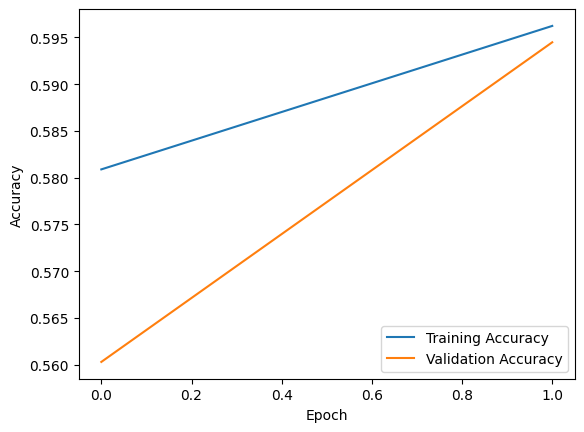

In [53]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [54]:
from tensorflow.keras.preprocessing import image

In [82]:
from google.colab import files
uploaded = files.upload()

Saving viva.jpeg to viva.jpeg


In [83]:
for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

In [84]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 38ms/step
Predicted Label: Jelly Fish
